## Import TensorFlow

In [ ]:
# Import Library
import tensorflow as tf

print(tf.__version__)

2.7.0


## Load the dataset

In [ ]:
# Load the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

## Build the model

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')                               
])

## Train the model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2971 - accuracy: 0.9136 - val_loss: 0.1409 - val_accuracy: 0.9585
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1455 - accuracy: 0.9572 - val_loss: 0.1102 - val_accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1082 - accuracy: 0.9674 - val_loss: 0.0820 - val_accuracy: 0.9743
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0718 - val_accuracy: 0.9800
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9788 - val_loss: 0.0707 - val_accuracy: 0.9792
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9811 - val_loss: 0.0737 - val_accuracy:

## Evaluate the model

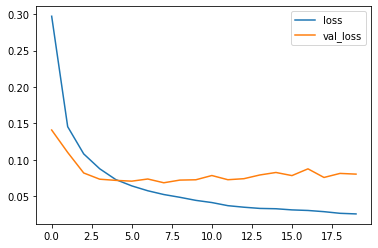

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

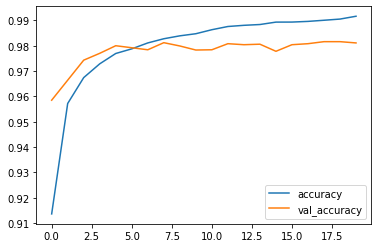

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9811


[0.08039729297161102, 0.9811000227928162]

In [ ]:
# Plot confusion matrix Func
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  
  if normalize:
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:,  np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()


Confusion matrix, without normalization
[[ 969    0    2    1    1    0    1    2    3    1]
 [   0 1121    3    1    0    0    2    2    6    0]
 [   2    0 1018    1    2    0    1    6    2    0]
 [   1    0    4  990    1    3    0    6    4    1]
 [   2    0    1    1  965    0    4    2    1    6]
 [   2    0    0   11    2  867    3    2    4    1]
 [   4    2    1    0    2    4  941    0    4    0]
 [   1    1    6    2    1    0    0 1014    2    1]
 [   5    0    3    6    4    1    0    5  948    2]
 [   0    2    0    6    8    3    1    8    3  978]]


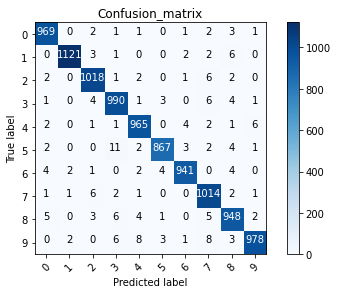

In [ ]:
# Predict & Evaluate
pred_test = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(10)))

## Evaluation on prediction result of True-Classified and Misclassified

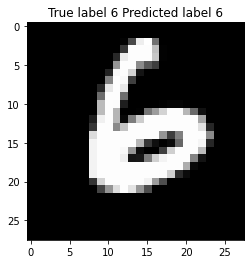

In [ ]:
# Show True-classified example
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label %s Predicted label %s" % (y_test[i], pred_test[i]));

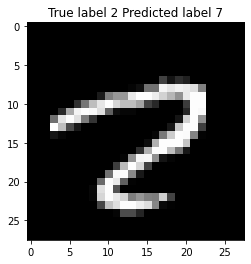

In [ ]:
# Show Misclassified example
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label %s Predicted label %s" % (y_test[i], pred_test[i]));